In [390]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import numpy as np

In [150]:
file = "Dataset/Snoring/M_26.wav"
ipd.Audio(file)

<ipython-input-151-455034c02c59>:2: FutureWarning: Pass orig_sr=22050, target_sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  wav = librosa.resample(wav, sr,16000)


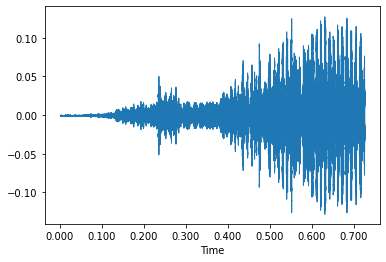

In [151]:
wav, sr = librosa.load(file)
wav = librosa.resample(wav, sr,16000)
librosa.display.waveshow(wav)

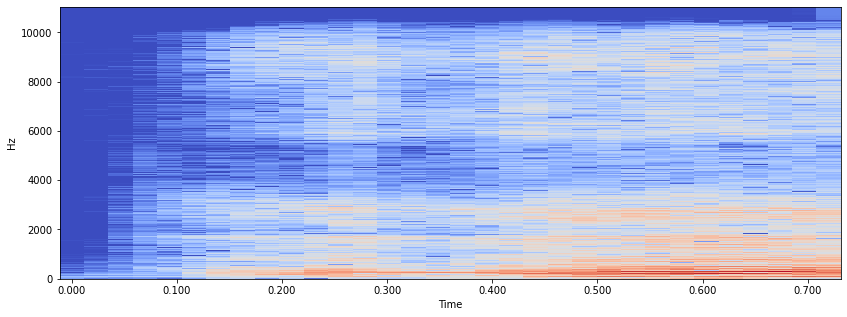

In [152]:
x_Stft = librosa.stft(wav)
x_db = librosa.amplitude_to_db(x_Stft)
plt.figure(figsize=(14,5))
librosa.display.specshow(x_db, sr=sr, x_axis = 'time', y_axis = 'hz')

In [153]:
x_db.shape

(1025, 32)

In [154]:
file_2 = "Dataset/Non-Snoring/1-47250-B-41.wav"
ipd.Audio(file_2)

<ipython-input-147-360c6ddd0af1>:2: FutureWarning: Pass orig_sr=22050, target_sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  wav_2 = librosa.resample(wav_2, sr,16000)


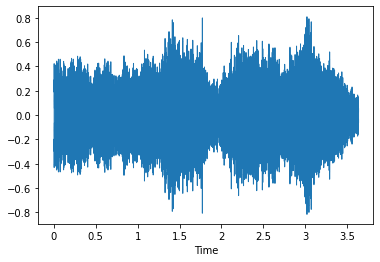

In [147]:
wav_2, sr = librosa.load(file_2)
wav_2 = librosa.resample(wav_2, sr,16000)
librosa.display.waveshow(wav_2)

C:\Users\luisb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\librosa\util\decorators.py:88: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return f(*args, **kwargs)


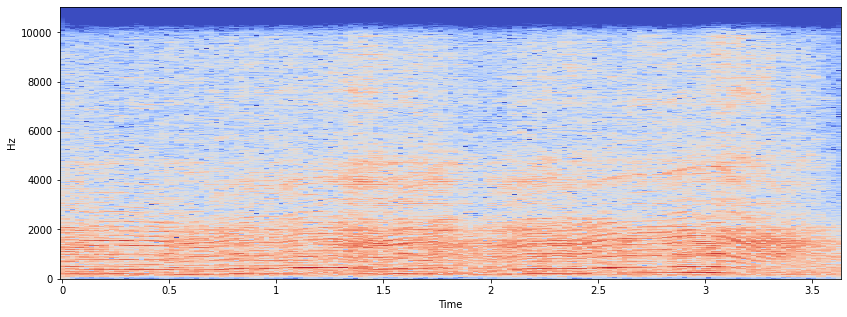

In [148]:
x_Stft_2 = librosa.stft(wav_2)
x_db_2 = librosa.amplitude_to_db(x_Stft_2)
plt.figure(figsize=(14,5))
librosa.display.specshow(x_db_2, sr=sr, x_axis = 'time', y_axis = 'hz')

In [20]:
lengths = []
for file in os.listdir(os.path.join('Dataset', 'Snoring')):
    wav, sr= librosa.load(os.path.join('Dataset', 'Snoring', file))
    wav = librosa.resample(wav, sr,16000)
    lengths.append(len(wav))

<ipython-input-20-39f4f2caf535>:4: FutureWarning: Pass orig_sr=22050, target_sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  wav = librosa.resample(wav, sr,16000)


In [69]:
mel_spectogram = librosa.feature.melspectrogram(wav, sr = sr, n_fft = 2048, hop_length = 512, n_mels = 50)
mel_spectogram.shape

<ipython-input-69-a1efcff4c783>:1: FutureWarning: Pass y=[ 7.8258301e-05  1.4119437e-04 -6.5899762e-06 ... -4.7857561e-03
 -2.7455101e-03  2.9352462e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spectogram = librosa.feature.melspectrogram(wav, sr = sr, n_fft = 2048, hop_length = 512, n_mels = 50)


(50, 32)

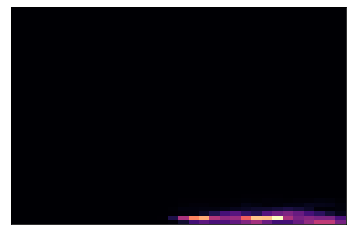

In [70]:
librosa.display.specshow(mel_spectogram)

In [71]:
log_mel_spectogram = librosa.power_to_db(mel_spectogram)
log_mel_spectogram.shape
log_mel_spectogram = log_mel_spectogram.T

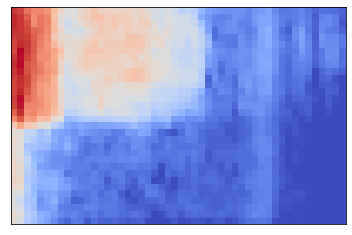

In [72]:
librosa.display.specshow(log_mel_spectogram)

In [73]:
mel_spectogram_2 = librosa.feature.melspectrogram(wav_2, sr = sr, n_fft = 2048, hop_length = 512, n_mels = 50)
mel_spectogram_2.shape

<ipython-input-73-4c485d0f345e>:1: FutureWarning: Pass y=[ 0.08540589 -0.02815014 -0.12890685 ... -0.02089332  0.14118268
  0.11285702] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spectogram_2 = librosa.feature.melspectrogram(wav_2, sr = sr, n_fft = 2048, hop_length = 512, n_mels = 50)


(50, 157)

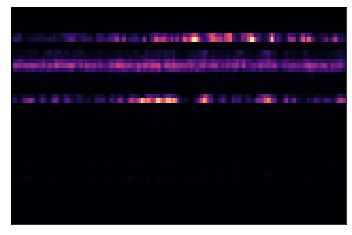

In [74]:
librosa.display.specshow(mel_spectogram_2)

In [75]:
log_mel_spectogram_2 = librosa.power_to_db(mel_spectogram_2)
log_mel_spectogram_2.shape
log_mel_spectogram_2 = log_mel_spectogram_2.T

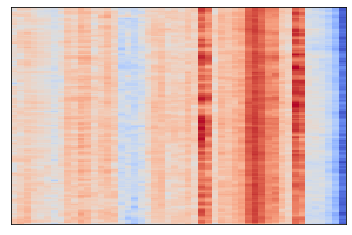

In [76]:
librosa.display.specshow(log_mel_spectogram_2)

In [160]:
import torch 

In [355]:
import numpy as np

In [308]:
def load_spectogram(file_path):
    signal, sr = librosa.load(file_path, sr = 16000)
    signal = librosa.resample(signal, sr,16000)
    signal = signal[:25000]
    N = 25000 - len(signal)
    signal = np.pad(signal, (N, 0), 'constant')
    # mel_spectogram = librosa.feature.melspectrogram(signal, sr = sr, n_fft = 2048, hop_length = 512, n_mels = 50)
    # log_mel_spectogram = librosa.power_to_db(mel_spectogram)
    # log_mel_spectogram = log_mel_spectogram.T
    x_Stft = librosa.stft(signal)
    x_db = librosa.amplitude_to_db(x_Stft)
    x_db = tf.convert_to_tensor(x_db)
    x_db = tf.expand_dims(x_db, axis = 0)
    # log_mel_spectogram = tf.convert_to_tensor(log_mel_spectogram)
    # log_mel_spectogram = tf.expand_dims(log_mel_spectogram, axis = 0)
    # mfcc = librosa.feature.mfcc(signal)
    # mfcc = mfcc.T
    # mfcc = tf.convert_to_tensor(mfcc)
    # final = tf.concat([log_mel_spectogram, mfcc], -1)
    # final = tf.expand_dims(final, axis = 0)
    return x_db

In [391]:
i = 0
for file in os.listdir(os.path.join('Snoring Dataset','1')):
    file_path = os.path.join('Snoring Dataset','1', file)
    if i ==0:
        snoring = load_spectogram(file_path) 
    
    else:
        temp = load_spectogram(file_path) 
        snoring = tf.concat([snoring, temp], axis = 0)
    i = i + 1

<ipython-input-308-3fb3bea6e9e4>:3: FutureWarning: Pass orig_sr=16000, target_sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  signal = librosa.resample(signal, sr,16000)


In [156]:
i = 0
for file in os.listdir(os.path.join('Data','Snoring')):
    file_path = os.path.join('Dataset','Snoring', file)
    if i ==0:
        snoring = load_spectogram(file_path) 
    
    else:
        temp = load_spectogram(file_path) 
        snoring = tf.concat([snoring, temp], axis = 0)
    i = i + 1

<ipython-input-155-7e522520bdfe>:3: FutureWarning: Pass orig_sr=16000, target_sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  signal = librosa.resample(signal, sr,16000)
C:\Users\luisb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\librosa\util\decorators.py:88: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return f(*args, **kwargs)


In [392]:
i = 0
for file in os.listdir(os.path.join('Data','Non_Snoring')):
    file_path = os.path.join('Data','Non_Snoring', file)
    if i ==0:
        non_snoring = load_spectogram(file_path) 
    
    else:
        temp = load_spectogram(file_path) 
        non_snoring = tf.concat([non_snoring, temp], axis = 0)
    i = i + 1

<ipython-input-308-3fb3bea6e9e4>:3: FutureWarning: Pass orig_sr=16000, target_sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  signal = librosa.resample(signal, sr,16000)


In [309]:
i = 0
for file in os.listdir(os.path.join('Dataset','Non-Snoring')):
    file_path = os.path.join("Dataset","Non-Snoring", file)
    if i ==0:
        non_snoring = load_spectogram(file_path) 
    
    else:
        temp = load_spectogram(file_path) 
        non_snoring = tf.concat([non_snoring, temp], axis = 0)
    i = i + 1

<ipython-input-308-3fb3bea6e9e4>:3: FutureWarning: Pass orig_sr=16000, target_sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  signal = librosa.resample(signal, sr,16000)


In [393]:
positive_snoring = tf.data.Dataset.from_tensor_slices((snoring))
pos_snoring = tf.data.Dataset.zip((positive_snoring, tf.data.Dataset.from_tensor_slices(tf.ones(len(positive_snoring)))))
negative_snoring = tf.data.Dataset.from_tensor_slices((non_snoring))
neg_snoring = tf.data.Dataset.zip((negative_snoring, tf.data.Dataset.from_tensor_slices(tf.zeros(len(negative_snoring)))))
data = pos_snoring.concatenate(neg_snoring)

In [394]:
data = data.cache()
data = data.shuffle(buffer_size=5000)
data = data.batch(16)
data = data.prefetch(8)

In [396]:
len(data)*.7

262.5

In [397]:
train = data.take(263)
test = data.skip(263).take(112)

In [398]:
samples, labels = train.as_numpy_iterator().next()
samples.shape

(16, 1025, 49)

In [399]:
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten, BatchNormalization, Normalization, AveragePooling2D, Dropout
from keras.models import Sequential

In [400]:
tf.keras.backend.clear_session()

In [401]:
model = Sequential()

tf.keras.callbacks.EarlyStopping(
    monitor="loss",
    patience=2,
    verbose=0,
    restore_best_weights=True,
)

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(1025, 49,1)))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())


model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

In [402]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision(), tf.keras.metrics.Accuracy()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1023, 47, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 511, 23, 16)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 511, 23, 16)      64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 509, 21, 16)       2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 254, 10, 16)      0         
 2D)                                                             
                                                        

In [405]:
hist = model.fit(train, epochs=200, validation_data=test)
model.save("cnn_2.h5")
model.save_weights("model_2.h5")

Epoch 1/200
263/263 [==============================] - 104s 393ms/step - loss: 0.0930 - recall: 0.9242 - precision: 0.9908 - accuracy: 0.2761 - val_loss: 0.0556 - val_recall: 0.9899 - val_precision: 0.9767 - val_accuracy: 0.3419
Epoch 2/200
263/263 [==============================] - 92s 351ms/step - loss: 0.0989 - recall: 0.9209 - precision: 0.9879 - accuracy: 0.2878 - val_loss: 0.1185 - val_recall: 0.9537 - val_precision: 0.9892 - val_accuracy: 0.2402
Epoch 3/200
263/263 [==============================] - 77s 292ms/step - loss: 0.1058 - recall: 0.9351 - precision: 0.9845 - accuracy: 0.2811 - val_loss: 0.0537 - val_recall: 0.9730 - val_precision: 0.9965 - val_accuracy: 0.3240
Epoch 4/200
263/263 [==============================] - 103s 392ms/step - loss: 0.0789 - recall: 0.9260 - precision: 0.9928 - accuracy: 0.3058 - val_loss: 0.0272 - val_recall: 0.9988 - val_precision: 0.9817 - val_accuracy: 0.3112
Epoch 5/200
263/263 [==============================] - 113s 428ms/step - loss: 0.0960 

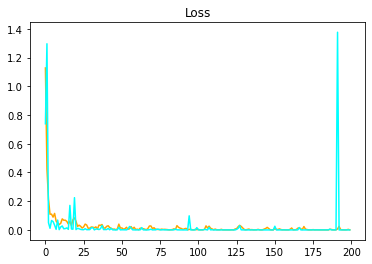

In [404]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'orange')
plt.plot(hist.history['val_loss'], 'cyan')
plt.show()

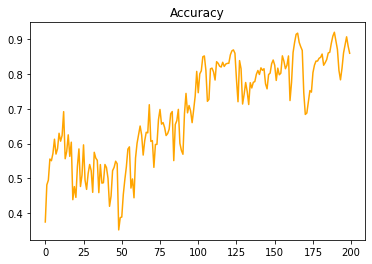

In [363]:
plt.title('Accuracy')
plt.plot(hist.history['accuracy'], 'orange')
# plt.plot(hist.history['val_accuracy'], 'yellow')
plt.show()

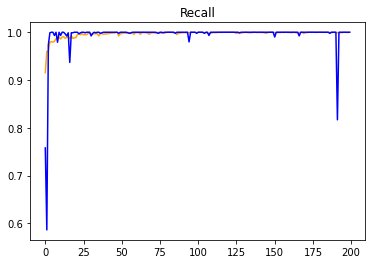

In [364]:
plt.title('Recall')
plt.plot(hist.history['recall'], 'orange')
plt.plot(hist.history['val_recall'], 'b')
plt.show()

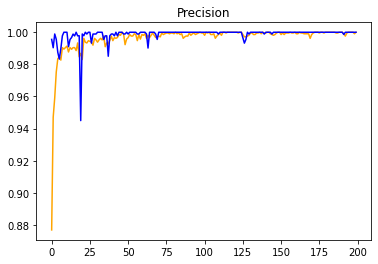

In [365]:
plt.title('Precision')
plt.plot(hist.history['precision'], 'orange')
plt.plot(hist.history['val_precision'], 'b')
plt.show()

In [366]:
X_test, y_test = test.as_numpy_iterator().next()

In [367]:
y_test

array([1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.],
      dtype=float32)

In [368]:
yhat = model.predict(X_test)
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]
yhat

1/1 [==============================] - 1s 690ms/step


[1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1]

In [383]:
file = "Data/Non_Snoring/0_1.wav"
ipd.Audio(file)

In [384]:
wav, sr = librosa.load(file)
wav = librosa.resample(wav, sr,16000)
wav = wav[:16000]

<ipython-input-384-e9c1327731df>:2: FutureWarning: Pass orig_sr=22050, target_sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  wav = librosa.resample(wav, sr,16000)


In [385]:
wav.shape

(16000,)

In [386]:
wav = load_spectogram(file)

<ipython-input-308-3fb3bea6e9e4>:3: FutureWarning: Pass orig_sr=16000, target_sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  signal = librosa.resample(signal, sr,16000)


In [387]:
yhat = model.predict(wav)

1/1 [==============================] - 0s 35ms/step


In [388]:
yhat

array([[0.656611]], dtype=float32)

In [389]:
yhat = [print("snoring") if prediction > 0.5 else print("Not Snoring") for prediction in yhat]


snoring


In [260]:
file = "Data/Snores/Annotation_from_Ch_1_but_output_from_Ch_1_filename_190530_230_st12_SampleNo_129_from_5850_sec_to_5944_sec_19.wav"
ipd.Audio(file)

In [112]:
import tensorflow as tfio

In [113]:
import tensorflow_io as tfio

In [114]:
file = "Data/Snores/Annotation_from_Ch_1_but_output_from_Ch_1_filename_190530_230_st12_SampleNo_121_from_5546_sec_to_5570_sec_5.wav"
ipd.Audio(file)

In [115]:
mp3, sr = librosa.load(file)
mp3 = librosa.resample(mp3, sr,16000)

<ipython-input-115-92489b79237b>:2: FutureWarning: Pass orig_sr=22050, target_sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mp3 = librosa.resample(mp3, sr,16000)


In [119]:
def slice_audio(mp3):
    segment_size = 16000
    segments = len(mp3)/segment_size
    segments = int(segments)
    slices = np.zeros(segment_size)
    x = 0
    y = segment_size
    for i in range(segments):
        temp = mp3[x:y]
        slices = np.vstack([slices, temp])
        x = x + segment_size
        y = y + segment_size
    slices = np.delete(slices, 0, 0)
    return slices

In [124]:
def load_log_mel(slices):
    for i in range(slices.shape[0]):
        mel_spectogram = librosa.feature.melspectrogram(slices[i], sr = 22050, n_fft= 2048, hop_length = 512, n_mels = 50 )
        log_mel_spectogram = librosa.power_to_db(mel_spectogram)
        log_mel_spectogram = log_mel_spectogram.T
        log_mel_spectogram = tf.convert_to_tensor(log_mel_spectogram)
        # mfcc = librosa.feature.mfcc(slices[i])
        # mfcc = mfcc.T
        # mfcc = tf.convert_to_tensor(mfcc)
        # final = tf.concat([log_mel_spectogram, mfcc], -1)
        # final = tf.expand_dims(final, axis = 0)
        if i == 0:
            log_mel_group = log_mel_spectogram
        else:
            log_mel_group = tf.concat([log_mel_group, log_mel_spectogram], axis = 0)

    return log_mel_group

In [121]:
def make_predictions(log_mel_group):
    for i in log_mel_group:
        yhat = model.predict(log_mel_group)
        yhat = [print("snoring") if prediction > 0.8 else print("Not Snoring") for prediction in yhat]

In [122]:
def classifier(file_path):
    mp3, sr = librosa.load(file_path)
    mp3 = librosa.resample(mp3, sr,16000)
    slices = slice_audio(mp3)
    log_mel_group = load_log_mel(slices)
    make_predictions(log_mel_group)

In [125]:
classifier(file)

<ipython-input-122-2bf68a82892d>:3: FutureWarning: Pass orig_sr=22050, target_sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mp3 = librosa.resample(mp3, sr,16000)
<ipython-input-124-41fe951cd917>:3: FutureWarning: Pass y=[ 0.00105403  0.00205263 -0.0002773  ... -0.00197331 -0.00168157
 -0.00182074] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spectogram = librosa.feature.melspectrogram(slices[i], sr = 22050, n_fft= 2048, hop_length = 512, n_mels = 50 )
<ipython-input-124-41fe951cd917>:3: FutureWarning: Pass y=[-0.00137086 -0.00166015 -0.00310434 ...  0.02270786  0.02203002
  0.0216627 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spectogram = librosa.feature.melspectrogram(slices[i], sr = 22050, n_fft= 2048, hop_length = 512, n_mels = 50 )
<ipython-input-124-41fe951cd917>:3: FutureWarning: Pass y=[0.02142743 0.

ValueError: in user code:

    File "C:\Users\luisb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\luisb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\luisb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\luisb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Users\luisb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\luisb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 32, 50, 1), found shape=(32, 50)


In [280]:
classifier("SnoringMP3/Owl.wav")

<ipython-input-275-2bf68a82892d>:3: FutureWarning: Pass orig_sr=22050, target_sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mp3 = librosa.resample(mp3, sr,16000)
<ipython-input-273-2ae0e161388d>:3: FutureWarning: Pass y=[0.00865982 0.02336073 0.03286925 ... 0.01625835 0.01569057 0.01533545] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spectogram = librosa.feature.melspectrogram(slices[i], sr = 22050, n_fft= 2048, hop_length = 512, n_mels = 10 )
<ipython-input-273-2ae0e161388d>:7: FutureWarning: Pass y=[0.00865982 0.02336073 0.03286925 ... 0.01625835 0.01569057 0.01533545] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(slices[i])
<ipython-input-273-2ae0e161388d>:3: FutureWarning: Pass y=[0.01337623 0.01129268 0.01317043 ... 0.01046165 0.00672285 0.00769606] as keyword args. From version 0.1

1/1 [==============================] - 0s 27ms/step
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
1/1 [==============================] - 0s 30ms/step
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
1/1 [==============================] - ETA: 0s

<ipython-input-273-2ae0e161388d>:3: FutureWarning: Pass y=[-0.11494785 -0.10250486 -0.09052532 ...  0.0089942   0.01069269
  0.00840958] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spectogram = librosa.feature.melspectrogram(slices[i], sr = 22050, n_fft= 2048, hop_length = 512, n_mels = 10 )
<ipython-input-273-2ae0e161388d>:7: FutureWarning: Pass y=[-0.11494785 -0.10250486 -0.09052532 ...  0.0089942   0.01069269
  0.00840958] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(slices[i])


1/1 [==============================] - 0s 26ms/step
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
1/1 [==============================] - 0s 24ms/step
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
1/1 [==============================] - 0s 23ms/step
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
1/1 [==============================] - 0s 24ms/step
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
snoring
